In [3]:
# import basic library
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [13]:
# define the bandit class
class Bandit ():
    
    def __init__(self, p, a=1, b=1):
        '''
        the class owns 4 properties
        p : the real mean
        a : alpha parameter of the beta function
        b : beta parameter of the beta function
        n : usage number of the current bandit
        '''
        self.p = p
        self.a = a
        self.b = b
        self.n = 0
        
    def __str__(self):
        '''
        redefine the print method
        '''
        return f"bandit real mean is {self.p}, property alpha is {self.a}, property beta is {self.b}, total usage is {self.n}"#", win rate is {(self.a-1)/self.n}" 
        
    def pull(self):
        '''
        pull the arm
        return boolean based on the true mean --> result interpreted as an int (0:lost or 1:win) 
        '''
        return np.random.random() < self.p
    
    def sample(self):
        '''
        select a sample between alpha and beta
        '''
        return np.random.beta(self.a, self.b)
    
    def update(self,x):
        '''
        update the Bandit instance based on the result of the current pull
        '''
        self.a += x
        self.b += 1 - x
        self.n += 1

def plot(bandits, trial):
    '''
    plot the distribution at the trial iteration
    '''
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x,b.a,b.b)
        plt.plot(x,y,label=print(b))
    plt.title = f"bandits distribution after {trial} trials"
    plt.legend()
    plt.show()
    
def play_game():
    '''
    Main function of the game
    initialise the bandit 
    pull until reach the number of total iterations NUM_TRIALS
    return values to print
    '''
    bandits = [Bandit(p) for p in [0.2,0.5,0.8]]
    NUM_TRIALS = 2000
    sample_points=[1,50,100,200,500,1000,1500,NUM_TRIALS-1]
    rewards=np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        
        # select the next Bandit to play based on thompson sampling
        j = np.argmax([b.sample() for b in bandits])
        
        #plot the postieriors
        if i in sample_points:
            plot(bandits, i)
        
        #pull the arm of the bandit with the largest sample
        x = bandits[j].pull()
        
        #update rewards
        rewards[i]=x
        
        #update the bandit we've just pull the arm
        bandits[j].update(x)
        
        
    print(f"total rewards earned {rewards.sum()}")


    

No handles with labels found to put in legend.


bandit real mean is 0.2, property alpha is 1, property beta is 1, total usage is 0
bandit real mean is 0.5, property alpha is 1, property beta is 1, total usage is 0
bandit real mean is 0.8, property alpha is 2, property beta is 1, total usage is 1


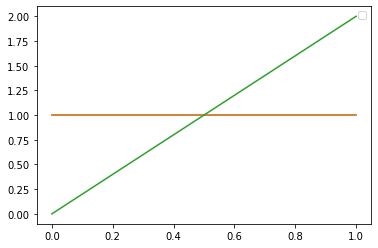

No handles with labels found to put in legend.


bandit real mean is 0.2, property alpha is 1, property beta is 2, total usage is 1
bandit real mean is 0.5, property alpha is 14, property beta is 7, total usage is 19
bandit real mean is 0.8, property alpha is 27, property beta is 5, total usage is 30


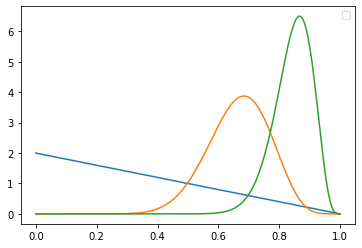

bandit real mean is 0.2, property alpha is 1, property beta is 3, total usage is 2


No handles with labels found to put in legend.


bandit real mean is 0.5, property alpha is 15, property beta is 7, total usage is 20
bandit real mean is 0.8, property alpha is 67, property beta is 13, total usage is 78


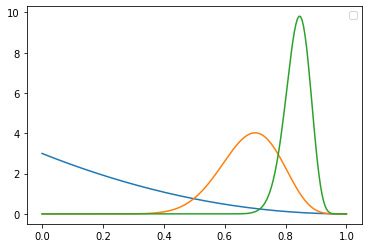

bandit real mean is 0.2, property alpha is 1, property beta is 4, total usage is 3
bandit real mean is 0.5, property alpha is 18, property beta is 9, total usage is 25

No handles with labels found to put in legend.



bandit real mean is 0.8, property alpha is 146, property beta is 28, total usage is 172


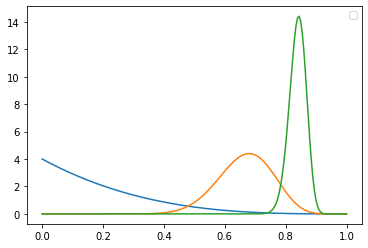

bandit real mean is 0.2, property alpha is 1, property beta is 5, total usage is 4


No handles with labels found to put in legend.


bandit real mean is 0.5, property alpha is 18, property beta is 11, total usage is 27
bandit real mean is 0.8, property alpha is 389, property beta is 82, total usage is 469


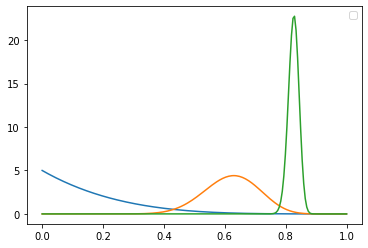

bandit real mean is 0.2, property alpha is 1, property beta is 5, total usage is 4

No handles with labels found to put in legend.



bandit real mean is 0.5, property alpha is 18, property beta is 13, total usage is 29
bandit real mean is 0.8, property alpha is 806, property beta is 163, total usage is 967


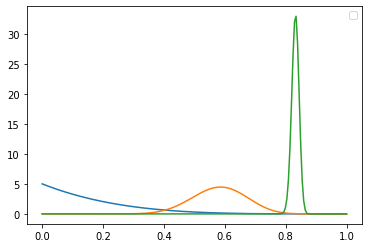

No handles with labels found to put in legend.


bandit real mean is 0.2, property alpha is 1, property beta is 5, total usage is 4
bandit real mean is 0.5, property alpha is 18, property beta is 13, total usage is 29
bandit real mean is 0.8, property alpha is 1222, property beta is 247, total usage is 1467


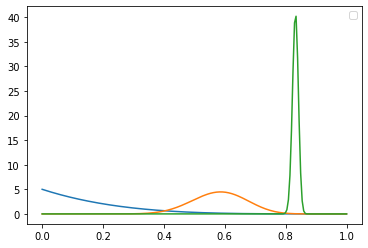

No handles with labels found to put in legend.


bandit real mean is 0.2, property alpha is 1, property beta is 5, total usage is 4
bandit real mean is 0.5, property alpha is 18, property beta is 13, total usage is 29
bandit real mean is 0.8, property alpha is 1629, property beta is 339, total usage is 1966


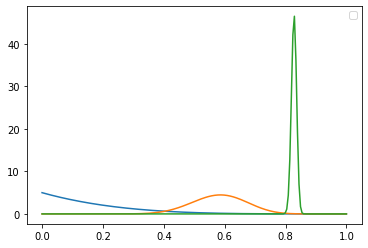

total rewards earned 1646.0


In [14]:
play_game()